<a href="https://colab.research.google.com/github/pulavartivinay/111801034/blob/main/Pulavarti_VinayKumar_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#start

In [40]:
#imports
import numpy as np
import random
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# **Data** **Set**

In [86]:
#train Data Set
data_train = pd.read_csv("/content/data_train.csv")

dataFrame_train_y = data_train['Outcome1']
dataFrame_train_y = pd.DataFrame(dataFrame_train_y, columns=['Outcome1'])
data_train.drop('Outcome1',axis=1,inplace=True)
dataSet_train_y = dataFrame_train_y.to_numpy()

#input for Train_X
dataFrame_train_X = data_train
print(dataFrame_train_X.columns)
dataSet_train_X = dataFrame_train_X.to_numpy()

#Data Preprocessing on input Train X
dataFrame_train_X['Outbreak_Related'].fillna("N/A", inplace = True)

dataFrame_train_X["Case_Reported_Date"] = pd.to_datetime(dataFrame_train_X["Case_Reported_Date"], format="%Y-%m-%d")
dataFrame_train_X["Case_Reported_Day"] = dataFrame_train_X["Case_Reported_Date"].dt.day
dataFrame_train_X["Case_Reported_Month"] = dataFrame_train_X["Case_Reported_Date"].dt.month
dataFrame_train_X["Case_Reported_Year"] = dataFrame_train_X["Case_Reported_Date"].dt.year

dataFrame_train_X["Test_Reported_Date"] = pd.to_datetime(dataFrame_train_X["Test_Reported_Date"], format="%Y-%m-%d")
dataFrame_train_X["Test_Reported_Day"] = dataFrame_train_X["Test_Reported_Date"].dt.day
dataFrame_train_X["Test_Reported_Month"] = dataFrame_train_X["Test_Reported_Date"].dt.month
dataFrame_train_X["Test_Reported_Year"] = dataFrame_train_X["Test_Reported_Date"].dt.year

dataFrame_train_X["Specimen_Date"] = pd.to_datetime(dataFrame_train_X["Specimen_Date"], format="%Y-%m-%d")
dataFrame_train_X["Specimen_Day"] = dataFrame_train_X["Specimen_Date"].dt.day
dataFrame_train_X["Specimen_Month"] = dataFrame_train_X["Specimen_Date"].dt.month
dataFrame_train_X["Specimen_Year"] = dataFrame_train_X["Specimen_Date"].dt.year

#Numerical Encoded Feature for some necessary input labels Train_X
necessary_details = ['Age_Group','Case_Reported_Day','Case_Reported_Month','Case_Reported_Year',
                     'Test_Reported_Day','Test_Reported_Month','Test_Reported_Year',
                     'Specimen_Day','Specimen_Month','Specimen_Year',
                     'Client_Gender','Case_AcquisitionInfo','Reporting_PHU_City','Reporting_PHU_ID']
for i in necessary_details:
  dataFrame_train_X[i] = (pd.factorize(dataFrame_train_X[i]))[0]

dataSet_train_X = dataFrame_train_X.to_numpy()
dataFrame_train_X.tail()

Index(['Row_ID', 'Accurate_Episode_Date', 'Case_Reported_Date',
       'Test_Reported_Date', 'Specimen_Date', 'Age_Group', 'Client_Gender',
       'Case_AcquisitionInfo', 'Outbreak_Related', 'Reporting_PHU_ID',
       'Reporting_PHU', 'Reporting_PHU_Address', 'Reporting_PHU_City',
       'Reporting_PHU_Postal_Code', 'Reporting_PHU_Website',
       'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'],
      dtype='object')


,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Case_Reported_Day,Case_Reported_Month,Case_Reported_Year,Test_Reported_Day,Test_Reported_Month,Test_Reported_Year,Specimen_Day,Specimen_Month,Specimen_Year
314898,314899,2020-10-11,2020-10-13,2020-10-13,2020-10-12,5,0,5,N/A,3,Toronto Public Health,"277 Victoria Street, 5th Floor",3,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,28,9,0,28,9,0,23,7,0
314899,314900,2020-06-02,2020-06-06,2020-06-06,2020-06-05,1,0,0,N/A,3,Toronto Public Health,"277 Victoria Street, 5th Floor",3,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,29,2,0,29,2,0,28,2,0
314900,314901,2020-05-25,2020-05-27,2020-05-27,2020-05-25,1,1,5,N/A,3,Toronto Public Health,"277 Victoria Street, 5th Floor",3,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,27,0,0,27,0,0,22,0,0
314901,314902,2020-11-30,2020-12-02,2020-12-02,2020-11-30,5,0,5,N/A,3,Toronto Public Health,"277 Victoria Street, 5th Floor",3,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,5,6,0,5,6,0,24,5,0
314902,314903,2020-09-23,2020-09-27,2020-09-27,2020-09-23,3,1,0,N/A,3,Toronto Public Health,"277 Victoria Street, 5th Floor",3,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,27,7,0,27,7,0,10,8,0


In [64]:
#One Hot Vector for output label y
dataFrame_train_y['Outcome1'].value_counts()
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(dataFrame_train_y['Outcome1'])
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(integer_encoded),columns = ['Fatal','Not Resolved','Resolved'])
dataFrame_train_y = dataFrame_train_y.join(onehot_encoded)
print(dataFrame_train_y.head())

   Outcome1  Fatal  Not Resolved  Resolved
0  Resolved    0.0           0.0       1.0
1     Fatal    1.0           0.0       0.0
2  Resolved    0.0           0.0       1.0
3  Resolved    0.0           0.0       1.0
4  Resolved    0.0           0.0       1.0


In [66]:
#test Data Set
dataFrame_test_X = pd.read_csv("/content/data_test.csv")

#Numerical Encoded Feature for some necessary input labels Test Data Set
dataFrame_test_X['Outbreak_Related'].fillna("N/A", inplace = True)

dataFrame_test_X["Case_Reported_Date"] = pd.to_datetime(dataFrame_test_X["Case_Reported_Date"], format="%Y-%m-%d")
dataFrame_test_X["Case_Reported_Day"] = dataFrame_test_X["Case_Reported_Date"].dt.day
dataFrame_test_X["Case_Reported_Month"] = dataFrame_test_X["Case_Reported_Date"].dt.month
dataFrame_test_X["Case_Reported_Year"] = dataFrame_test_X["Case_Reported_Date"].dt.year

dataFrame_test_X["Test_Reported_Date"] = pd.to_datetime(dataFrame_test_X["Test_Reported_Date"], format="%Y-%m-%d")
dataFrame_test_X["Test_Reported_Day"] = dataFrame_test_X["Test_Reported_Date"].dt.day
dataFrame_test_X["Test_Reported_Month"] = dataFrame_test_X["Test_Reported_Date"].dt.month
dataFrame_test_X["Test_Reported_Year"] = dataFrame_test_X["Test_Reported_Date"].dt.year

dataFrame_test_X["Specimen_Date"] = pd.to_datetime(dataFrame_test_X["Specimen_Date"], format="%Y-%m-%d")
dataFrame_test_X["Specimen_Day"] = dataFrame_test_X["Specimen_Date"].dt.day
dataFrame_test_X["Specimen_Month"] = dataFrame_test_X["Specimen_Date"].dt.month
dataFrame_test_X["Specimen_Year"] = dataFrame_test_X["Specimen_Date"].dt.year

for i in necessary_details:
  dataFrame_test_X[i] = (pd.factorize(dataFrame_test_X[i]))[0]

dataSet_test_X = dataFrame_test_X.to_numpy()

# **Model**

In [67]:
class Covid_Network:
  def __init__(self, numInput, numHidden, numOutput, seed):
    self.ni = numInput #Number of input layer nodes
    self.nh = numHidden #Number of Hidden layer nodes
    self.no = numOutput #Number of Output layer nodes
	
    self.iNodes = np.zeros(shape=[self.ni], dtype=np.float32)
    self.hNodes = np.zeros(shape=[self.nh], dtype=np.float32)
    self.oNodes = np.zeros(shape=[self.no], dtype=np.float32)
	
    self.ihWeights = np.zeros(shape=[self.ni,self.nh], dtype=np.float32) # input-hidden weights
    self.hoWeights = np.zeros(shape=[self.nh,self.no], dtype=np.float32) # hidden-output weights
	
    self.hBiases = np.zeros(shape=[self.nh], dtype=np.float32) # hidden biases
    self.oBiases = np.zeros(shape=[self.no], dtype=np.float32) # output biases
	
    self.rnd = random.Random(seed) # allows multiple instances
    self.initializeWeights()

  def initializeWeights(self):
    numWts = self.totalWeights(self.ni, self.nh, self.no)
    wts = np.zeros(shape=[numWts], dtype=np.float32)
    lo = -0.01; hi = 0.01
    wts = (hi - lo)*self.rnd.random()*(np.ones(shape=[numWts], dtype=np.float32)) + lo
    self.setWeights(wts)

  def getWeights(self):
    tw = self.totalWeights(self.ni, self.nh, self.no)
    result = []
    result = np.zeros(shape=[tw], dtype=np.float32)
    idx = 0  # points into result
    
    for i in range(self.ni):
      for j in range(self.nh):
        result[idx] = self.ihWeights[i,j]
        idx += 1
		
    for j in range(self.nh):
      result[idx] = self.hBiases[j]
      idx += 1

    for j in range(self.nh):
      for k in range(self.no):
        result[idx] = self.hoWeights[j,k]
        idx += 1
	  
    for k in range(self.no):
      result[idx] = self.oBiases[k]
      idx += 1

    return result


  def setWeights(self, weights):
    if len(weights) != self.totalWeights(self.ni, self.nh, self.no):
      print("Warning: len(weights) error in setWeights()")	

    idx = 0
    for i in range(self.ni):
      for j in range(self.nh):
        self.ihWeights[i,j] = weights[idx]
        idx += 1
    
    for j in range(self.nh):
      self.hBiases[j] = weights[idx]
      idx += 1
    
    for j in range(self.nh):
      for k in range(self.no):
        self.hoWeights[j,k] = weights[idx]
        idx += 1
	  
    for k in range(self.no):
      self.oBiases[k] = weights[idx]
      idx += 1

  def computeOutputs(self, xValues):
    hSums = np.zeros(shape=[self.nh], dtype=np.float32)
    oSums = np.zeros(shape=[self.no], dtype=np.float32)

    
    self.iNodes = xValues

    hSums = np.matmul(self.ihWeights.T, self.iNodes)

    hSums.resize(hSums.shape[0],1)
    self.hBiases.resize(self.hBiases.shape[0],1)
    hSums += self.hBiases
	  
    self.hNodes = self.hypertan(hSums)

    oSums = np.matmul(self.hoWeights.T, self.hNodes)

    oSums.resize(oSums.shape[0],1)
    self.oBiases.resize(self.oBiases.shape[0],1)
    oSums += self.oBiases
 
    softOut = self.softmax(oSums)
    self.oNodes = softOut
	  
    return self.oNodes
	
  def train(self, trainData, validationData, maxEpochs, learnRate, train_acc_list, val_acc_list):
    hoGrads = np.zeros(shape=[self.nh, self.no], dtype=np.float32)  # hidden-to-output weights gradients
    obGrads = np.zeros(shape=[self.no], dtype=np.float32)  # output node biases gradients
    ihGrads = np.zeros(shape=[self.ni, self.nh], dtype=np.float32)  # input-to-hidden weights gradients
    hbGrads = np.zeros(shape=[self.nh], dtype=np.float32)  # hidden biases gradients
	
    oSignals = np.zeros(shape=[self.no], dtype=np.float32)  # output signals: gradients w/o assoc. input terms
    hSignals = np.zeros(shape=[self.nh], dtype=np.float32)  # hidden signals: gradients w/o assoc. input terms

    epoch = 0
    x_values = np.zeros(shape=[self.ni], dtype=np.float32)
    t_values = np.zeros(shape=[self.no], dtype=np.float32)
    numTrainItems = len(trainData)
    indices = np.arange(numTrainItems)  # [0, 1, 2, . . n-1]  # rnd.shuffle(v)

    while epoch < maxEpochs:
      self.rnd.shuffle(indices)  # scramble order of training items
      for ii in range(numTrainItems):
        idx = indices[ii]

        for j in range(self.ni):
          x_values[j] = trainData[idx, j]  # get the input values	
        for j in range(self.no):
          t_values[j] = trainData[idx, j+self.ni]  # get the target values
        self.computeOutputs(x_values)  # results stored internally
		
        derivative = (1 - self.oNodes)*(self.oNodes)
        oSignals = derivative * (self.oNodes - t_values)
        oSignals.resize(oSignals.shape[0],1)
        self.hNodes.resize(self.hNodes.shape[0],1)
        

        hoGrads = np.matmul(self.hNodes, oSignals.T)
			
        obGrads = oSignals * 1.0
		  
        sum = np.sum(np.matmul(self.hoWeights, oSignals), axis = 0)      #???????
        derivative = (1 - self.hNodes)*(1 + self.hNodes)
        hSignals = derivative*sum
        hSignals.resize(hSignals.shape[0],1)
        self.iNodes.resize(self.iNodes.shape[0],1)

		 
        ihGrads = np.matmul(self.iNodes, hSignals.T)

        hbGrads = hSignals * 1.0

        self.ihWeights += -1.0 * learnRate * ihGrads 
			
        self.hBiases += -1.0 * learnRate * hbGrads      
		  
        self.hoWeights += -1.0 * learnRate * hoGrads 
			
        self.oBiases += -1.0 * learnRate * obGrads  
 		  
      epoch += 1
      train_acc = self.accuracy(trainData)
      train_acc_list.append(train_acc)
      val_acc = self.accuracy(validationData)
      val_acc_list.append(val_acc)
      mse = self.meanSquaredError(trainData)
      print("epoch = " + str(epoch) + " ms error = %0.4f " % mse + " train_acc = %0.4f " % train_acc + " val_acc = %0.4f " % val_acc)
    # end while
    
    result = self.getWeights()
    return train_acc_list, val_acc_list
  # end train

  def accuracy(self, tdata):  # train or test data matrix
    num_correct = 0; num_wrong = 0
    x_values = np.zeros(shape=[self.ni], dtype=np.float32)
    t_values = np.zeros(shape=[self.no], dtype=np.float32)

    for i in range(len(tdata)):  # walk thru each data item
      for j in range(self.ni):  # peel off input values from curr data row 
        x_values[j] = tdata[i,j]
      for j in range(self.no):  # peel off tareget values from curr data row
        t_values[j] = tdata[i, j+self.ni]

      y_values = self.computeOutputs(x_values)  # computed output values)
      max_index = np.argmax(y_values)  # index of largest output value 

      if abs(t_values[max_index] - 1.0) < 1.0e-5:
        num_correct += 1
      else:
        num_wrong += 1

    return (num_correct * 1.0) / (num_correct + num_wrong)

  def meanSquaredError(self, tdata):  # on train or test data matrix
    sumSquaredError = 0.0
    x_values = np.zeros(shape=[self.ni], dtype=np.float32)
    t_values = np.zeros(shape=[self.no], dtype=np.float32)

    for ii in range(len(tdata)):  # walk thru each data item
      for jj in range(self.ni):  # peel off input values from curr data row 
        x_values[jj] = tdata[ii, jj]
      for jj in range(self.no):  # peel off tareget values from curr data row
        t_values[jj] = tdata[ii, jj+self.ni]

      y_values = self.computeOutputs(x_values)  # computed output values
	  
      for j in range(self.no):
        err = t_values[j] - y_values[j]
        sumSquaredError += err * err  # (t-o)^2
		
    return sumSquaredError / len(tdata)
          
  @staticmethod
  def hypertan(x):
    return np.tanh(x)

  @staticmethod	  
  def softmax(oSums):
    result = np.zeros(shape=[len(oSums)], dtype=np.float32)
    m = max(oSums)
    divisor = 0.0
    for k in range(len(oSums)):
        divisor += math.exp(oSums[k] - m)
    for k in range(len(result)):
      result[k] =  math.exp(oSums[k] - m) / divisor
    return result

  @staticmethod
  def totalWeights(nInput, nHidden, nOutput):
    tw = (nInput * nHidden) + (nHidden * nOutput) + nHidden + nOutput
    return tw

# end class Covid_Network

In [68]:
X = np.array(dataFrame_train_X[necessary_details])
temp_y = ['Fatal','Not Resolved','Resolved']
y = np.array(dataFrame_train_y[temp_y])
input_train = (dataFrame_train_X[necessary_details]).join(dataFrame_train_y[temp_y])

# **Split** **into** **Train** **and** **Validation** **Data** **Set**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

X_train = normalize(X_train)
train = (pd.DataFrame(X_train, columns=necessary_details)).join(pd.DataFrame(y_train, columns=temp_y))
print(train.head())
train = np.array(train)

X_test = normalize(X_test)
validation = (pd.DataFrame(X_test, columns=necessary_details)).join(pd.DataFrame(y_test, columns=temp_y))
print(validation.head())
validation = np.array(validation)

   Age_Group  Case_Reported_Day  ...  Not Resolved  Resolved
0   0.273931           0.430463  ...           0.0       1.0
1   0.154303           0.586353  ...           0.0       1.0
2   0.228218           0.182574  ...           0.0       1.0
3   0.130057           0.364159  ...           0.0       1.0
4   0.119239           0.397464  ...           0.0       1.0

[5 rows x 17 columns]
   Age_Group  Case_Reported_Day  ...  Not Resolved  Resolved
0   0.030758           0.215308  ...           0.0       1.0
1   0.235521           0.039253  ...           0.0       1.0
2   0.000000           0.503651  ...           0.0       1.0
3   0.000000           0.026298  ...           0.0       1.0
4   0.102858           0.205716  ...           0.0       1.0

[5 rows x 17 columns]


# **Train** **the** **Model**

In [71]:
#Training the Model

numInput = 14
numHidden = 10
numOutput = 3
print("\nCreating a %d-%d-%d neural network " %
  (numInput, numHidden, numOutput) )
cn = Covid_Network(numInput, numHidden, numOutput, seed=3)

maxEpochs = 4
learnRate = 0.03
train_acc_list = []
val_acc_list = []
print("\nSetting maxEpochs = " + str(maxEpochs))
print("Setting learning rate = %0.3f " % learnRate)
print("\nStarting training")
train_acc_list, val_acc_list = cn.train(train, validation, maxEpochs, learnRate, train_acc_list, val_acc_list)
print("Training complete")


Creating a 14-10-3 neural network 

Setting maxEpochs = 4
Setting learning rate = 0.030 

Starting training
epoch = 1 ms error = 0.1252  train_acc = 0.9245  val_acc = 0.9253 
epoch = 2 ms error = 0.1026  train_acc = 0.9328  val_acc = 0.9332 
epoch = 3 ms error = 0.0995  train_acc = 0.9345  val_acc = 0.9349 
epoch = 4 ms error = 0.0965  train_acc = 0.9382  val_acc = 0.9383 
Training complete


# **Performance** **and** **evalution** **on** **Train** **and** **Test** **Data** **Sets**

In [72]:
accTrain = cn.accuracy(train)
accValidation = cn.accuracy(validation)

print("\nAccuracy on train data = %0.4f " % accTrain)
print("Accuracy on validation data   = %0.4f " % accValidation)  


Accuracy on train data = 0.9382 
Accuracy on validation data   = 0.9383 


**f1-** **score** **evalution** **on** **Validation** **Data** **set**

In [73]:
x_values = np.zeros(shape=[numInput], dtype=np.float32)
t_values = np.zeros(shape=[numOutput], dtype=np.float32)

pred_y_values = []
true_y_values = []
validation_set = np.array(validation)
print(validation_set, len(validation_set))
for i in range(len(validation_set)):  # walk through each data item
  for j in range(numInput):  # peel off input values from curr data row 
    x_values[j] = validation_set[i,j]
  for j in range(numOutput):  # peel off tareget values from curr data row
    t_values[j] = validation_set[i,j+numInput]

  store = (cn.computeOutputs(x_values))  # computed output values
  pred_y_values.append(np.argmax(store)) # index of largest output value
  true_y_values.append(np.argmax(t_values)) # index of true value
print(pred_y_values)
print(true_y_values)


[[0.03075831 0.21530819 0.15379156 ... 0.         0.         1.        ]
 [0.2355206  0.03925343 0.2355206  ... 0.         0.         1.        ]
 [0.         0.50365071 0.33576714 ... 0.         0.         1.        ]
 ...
 [0.16351749 0.06540699 0.16351749 ... 0.         0.         1.        ]
 [0.14948702 0.56057632 0.         ... 0.         0.         1.        ]
 [0.17011439 0.17011439 0.0283524  ... 0.         0.         1.        ]] 62981
[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 

In [85]:
#Measure the f1-score on validation
f1_score(true_y_values, pred_y_values, average='weighted')

0.9283101959521626

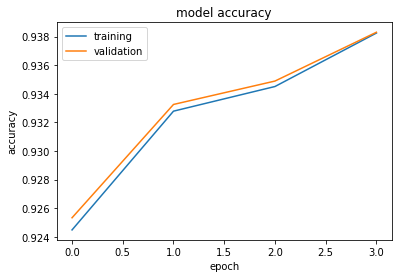

In [75]:
#Plot the data
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [79]:
#predictions on Test data
input_test = (dataFrame_test_X[necessary_details])
input_test_X = np.array(input_test)
x_values = np.zeros(shape=[numInput], dtype=np.float32)

Outcome1 = []
Row_ID = []
for i in range(len(input_test_X)):  # walk through each data item
  Row_ID.append(i+1)
  for j in range(numInput):  # peel off input values from curr data row 
    x_values[j] = input_test_X[i,j]

  store = (cn.computeOutputs(x_values))  # computed output values
  if(np.argmax(store) == 0):
    Outcome1.append('Fatal')
  elif(np.argmax(store) == 1):
    Outcome1.append('Resolved')
  elif(np.argmax(store) == 2):
    Outcome1.append('Not Resolved')
print(Outcome1)
print(len(Outcome1))


['Not Resolved', 'Not Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Resolved', 'Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Not Resolved', 'Not Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Not Resolved', 'Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Not Resolved', 'Resolved', 'Not Resolved', 'Not Resolv

In [83]:
Outcome1.count('Not Resolved')

14925

In [77]:
dict_table = {'Row_ID': Row_ID, 'Outcome1': Outcome1} 
df = pd.DataFrame(dict_table)
df.head()
# saving the dataframe to Predictions.csv
df.to_csv('Predictions.csv')